In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential






In [6]:
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.mnist.load_data()

In [8]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [9]:
(X_train, y_train), (X_test, y_test) = mnist

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

the value of imashow0


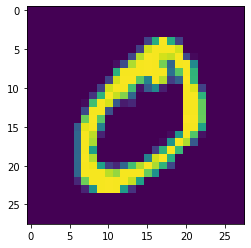

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])
print(f"the value of imashow{y_train[1]}")

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_train
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [17]:
#Normalization 
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
#converting it into one hot encoding [0,0,0,0,0,1,0,0,0]
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_test[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
model = Sequential()#Sequential groups a linear stack of layers
model.add(Conv2D(6,kernel_size=(5,5), padding = 'valid', activation='tanh', input_shape=(28,28,1))) #given in research paper of nenet-5
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding='valid'))
model.add(Conv2D(16,kernel_size=(5,5), padding = 'valid', activation='tanh')) #given in research paper
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding='valid'))
model.add(Flatten())#Flattens the input. Does not affect the batch size
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()



2023-01-14 05:49:12.386606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 05:49:12.467238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 05:49:12.468022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 05:49:12.469651: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [21]:
(120*256+120) + (84*120+84) + (84*10+10) + 2416 + 156

44426

In [22]:
6*28

168

In [23]:
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 4)

In [24]:
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, batch_size=120, epochs = 10,validation_data=(X_test, y_test),callbacks=[stop])

2023-01-14 05:49:26.909295: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-01-14 05:49:28.163411: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


500/500 [==============================] - 9s 4ms/step - loss: 0.3545 - accuracy: 0.8981 - val_loss: 0.1636 - val_accuracy: 0.9531
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.1313 - accuracy: 0.9605 - val_loss: 0.0978 - val_accuracy: 0.9707
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0845 - accuracy: 0.9745 - val_loss: 0.0679 - val_accuracy: 0.9784
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0704 - val_accuracy: 0.9782
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0519 - val_accuracy: 0.9841
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0492 - val_accuracy: 0.9843
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0519 - val_accuracy: 0.9835
Epoch 8/10
500/50

In [26]:
score = model.evaluate(X_test, y_test)

print("Test loss",score[0])
print("test Accuracy" , score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9863
Test loss 0.04295406863093376
test Accuracy 0.986299991607666


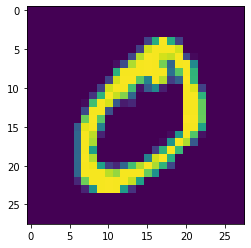

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [19]:
oxflower17 = tf.keras.datasets.tf_flowers.load_data()

AttributeError: module 'keras.api._v2.keras.datasets' has no attribute 'tf_flowers'

In [20]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=6865329d003e28d39d50d6ec15372afaa7af433ceb27029688bbffdb630a60eb
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [21]:
import tensorflow_datasets as tfds
import tflearn.datasets.oxflower17 as oxflower17
X, y= oxflower17.load_data(one_hot=True)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [22]:
X

array([[[[0.39215687, 0.30980393, 0.29803923],
         [0.2784314 , 0.2       , 0.18431373],
         [0.2901961 , 0.20784314, 0.19607843],
         ...,
         [0.29411766, 0.2       , 0.05098039],
         [0.32941177, 0.25490198, 0.1882353 ],
         [0.23921569, 0.16862746, 0.15294118]],

        [[0.23137255, 0.15686275, 0.14117648],
         [0.21960784, 0.14509805, 0.12941177],
         [0.19215687, 0.11764706, 0.10588235],
         ...,
         [0.4117647 , 0.30588236, 0.14509805],
         [0.32156864, 0.23529412, 0.15686275],
         [0.24705882, 0.17254902, 0.13725491]],

        [[0.23921569, 0.16470589, 0.15686275],
         [0.35686275, 0.2784314 , 0.27450982],
         [0.60784316, 0.53333336, 0.5294118 ],
         ...,
         [0.5176471 , 0.3882353 , 0.25882354],
         [0.31764707, 0.21176471, 0.14509805],
         [0.23921569, 0.14117648, 0.10588235]],

        ...,

        [[0.12941177, 0.08235294, 0.09803922],
         [0.10588235, 0.05882353, 0.07450981]

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
X.shape
#image shape = 224
#channel = 3 (R,G,B)

(1360, 224, 224, 3)

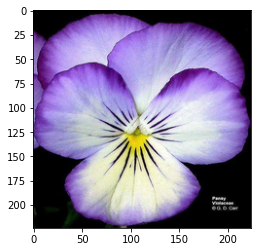

In [25]:
plt.imshow(X[1])

In [26]:
y.shape

(1360, 17)

In [27]:
from tensorflow.keras.layers import Activation,MaxPooling2D, BatchNormalization, Dropout

In [28]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())



# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))


# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)      

In [29]:
1024*4096 +4096

4198400

In [30]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [31]:
history = model.fit(X, y, batch_size=60, epochs=10,validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples


2023-01-13 02:10:08.406041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:10:08.406833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:10:08.407351: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:10:08.407881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:10:08.408358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/10
1088/1088 [==============================] - ETA: 0s - loss: 8.5533 - acc: 0.1544

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 3s 3ms/sample - loss: 8.5533 - acc: 0.1544 - val_loss: 690146.6581 - val_acc: 0.0846
Epoch 2/10
1088/1088 [==============================] - 1s 918us/sample - loss: 7.0690 - acc: 0.1801 - val_loss: 18449.7048 - val_acc: 0.0882
Epoch 3/10
1088/1088 [==============================] - 1s 891us/sample - loss: 5.9407 - acc: 0.2233 - val_loss: 4098.0105 - val_acc: 0.0331
Epoch 4/10
1088/1088 [==============================] - 1s 898us/sample - loss: 5.3719 - acc: 0.2537 - val_loss: 991.5501 - val_acc: 0.0662
Epoch 5/10
1088/1088 [==============================] - 1s 900us/sample - loss: 5.3748 - acc: 0.2224 - val_loss: 779.6488 - val_acc: 0.1029
Epoch 6/10
1088/1088 [==============================] - 1s 904us/sample - loss: 5.8550 - acc: 0.2325 - val_loss: 536.3282 - val_acc: 0.0294
Epoch 7/10
1088/1088 [==============================] - 1s 1ms/sample - loss: 4.4117 - acc: 0.2610 - val_loss: 98.4188 - val_acc: 0.1654
Epoch 8/10
1088/1088 [========

In [32]:
history.history

{'loss': [8.553306291208548,
  7.069014198639813,
  5.940686020781012,
  5.371896479059668,
  5.374764854417128,
  5.8549712957704765,
  4.411741118220722,
  4.447618731681039,
  4.117895209613969,
  5.819524420534863],
 'acc': [0.15441176,
  0.18014705,
  0.2233456,
  0.25367647,
  0.22242647,
  0.23253676,
  0.26102942,
  0.2803309,
  0.2601103,
  0.20680147],
 'val_loss': [690146.6580882353,
  18449.704790900734,
  4098.0104765050555,
  991.5501242244945,
  779.6487588321461,
  536.3282354018268,
  98.41881718355067,
  45.61502507153679,
  43.92494414834415,
  30.330566742840936],
 'val_acc': [0.08455882,
  0.0882353,
  0.033088237,
  0.066176474,
  0.10294118,
  0.029411765,
  0.16544117,
  0.05882353,
  0.09191176,
  0.06985294]}

In [33]:
#print("Test loss",history.key())
print("test Accuracy" , history.history[1])

KeyError: 1